## Loading Dependencies

In [1]:
%pip install pandas
%pip install plotly
%pip install scikit-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
cleaned_data = pd.read_csv('cleaned_badminton.csv')
# removal indexes
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0'])
cleaned_data

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OBSERVATION NUMBER,SERVING SHOT,OUT OF BOUNDS
0,4,1,10,40,0,4.075543,1.000000,1.662912,0,1,0.0
1,4,1,10,40,0,4.152007,1.000000,1.724866,0,1,0.0
2,4,1,10,40,0,4.228906,1.000000,1.788139,0,1,0.0
3,4,1,10,40,0,4.302100,1.000000,1.845245,0,1,0.0
4,4,1,10,40,0,4.376877,1.000000,1.904128,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
168837,4,4,70,70,50,9.276323,10.288077,3.041504,1575,0,1.0
168838,4,4,70,70,50,9.326762,10.348188,2.466079,1575,0,1.0
168839,4,4,70,70,50,9.373273,10.403617,1.861569,1575,0,1.0
168840,4,4,70,70,50,9.414002,10.452156,1.230060,1575,0,1.0


In [7]:
# Select your independent X features
independent_x = cleaned_data[['HUMAN PLAYER POSITION (X) metres', 
                        'HUMAN PLAYER POSITION (Y) metres', 
                        'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                        'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                        'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)']]

# Select your dependent y feature
dependent_y = cleaned_data[['SHUTTLECOCK POSITIION IN AIR(X ) metres', 'SHUTTLECOCK POSITIION IN AIR(Y) metres', 'SHUTTLECOCK POSITIION IN AIR(Z) metres']]

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_x, dependent_y, test_size=0.2, random_state=42)

print("% % % %",len(X_train), len(X_test), len(y_train), len(y_test))
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

% % % % 135073 33769 135073 33769
Coefficients: 
 [[ 0.00000000e+00 -5.42350171e-04  1.33116428e-02 -2.59943090e-02
  -1.36473152e-04]
 [ 0.00000000e+00  1.00598613e+00  1.04751686e-03 -2.11109663e-03
   6.70476332e-02]
 [ 0.00000000e+00  1.76470720e-02  1.00581597e-02  5.58471379e-02
  -2.89573482e-03]]
Mean squared error: 1.74
Coefficient of determination (R^2): 0.36


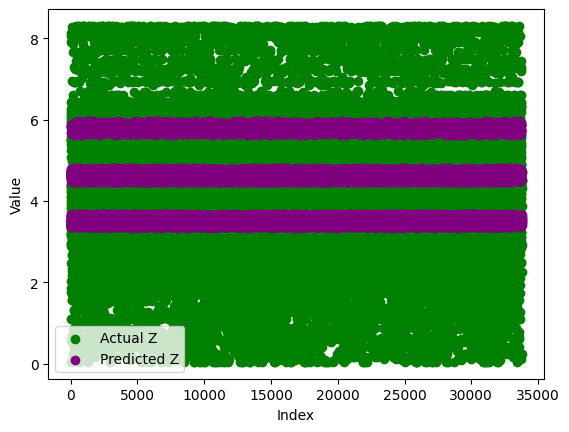

In [13]:
# Assuming y_test is a DataFrame with columns X, Y, Z

# Plotting the actual values
# plt.scatter(range(len(y_test)), y_test['SHUTTLECOCK POSITIION IN AIR(X ) metres'], color='red', label='Actual X')
# plt.scatter(range(len(y_test)), y_test['SHUTTLECOCK POSITIION IN AIR(Y) metres'], color='blue', label='Actual Y')
plt.scatter(range(len(y_test)), y_test['SHUTTLECOCK POSITIION IN AIR(Z) metres'], color='green', label='Actual Z')

# Plotting the predicted values
# plt.scatter(range(len(y_pred)), y_pred[:, 0], color='orange', label='Predicted X')
# plt.scatter(range(len(y_pred)), y_pred[:, 1], color='cyan', label='Predicted Y')
plt.scatter(range(len(y_pred)), y_pred[:, 2], color='purple', label='Predicted Z')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()